In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from collections import Counter
import json
import hdbscan
import random



In [5]:
items_df=pd.read_json("selected_columns_items_df_with_tags.jsonl" , lines=True)
stores_df=pd.read_json("selected_columns_stores_df_with_tags.jsonl" , lines=True)

In [6]:
items_df.columns

Index(['item_id', 'store_id', 'item_content', 'price', 'is_adult',
       'sales_count', 'view_count', 'tags', 'item_category'],
      dtype='object')

stores_df.columns

In [7]:

# 아이템 설명과 태그를 합쳐 하나의 텍스트 데이터로 사용
items_df['text_data'] = items_df['item_content'] + ' ' + items_df['tags'] +items_df['item_category']

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(max_features=100000)
tfidf_matrix = tfidf_vectorizer.fit_transform(items_df['text_data'].values.astype('U'))

# 가격과 조회수 데이터를 특성 행렬에 추가
features = np.hstack((tfidf_matrix.toarray(), items_df[['is_adult', 'price', 'view_count']].values))


In [165]:
# K-means 클러스터링을 사용하여 100개의 클러스터로 데이터 분류
kmeans = KMeans(n_clusters=100, random_state=42)
clusters = kmeans.fit_predict(features)


# 클러스터링 결과를 아이템 데이터프레임에 추가
items_df['KMeans_clusters'] = clusters

In [24]:
items_df.rename(columns={'cluster': 'kmean_cluster'}, inplace=True)
items_df.head()

item_id  store_id                                       item_content  \
0        3         2  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
1        4         2  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
2        5         2  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
3        6         2  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
4        7         3  안녕하세요, 관상가 화인입니다 :) \n\n비대면 시대에 꼭 어울리는 관상 콘텐츠를...   

   price  is_adult  sales_count  view_count            tags  \
0  20000         0            0          76     #일러스트#아트#그림   
1  25000         0            0          64     #일러스트#아트#그림   
2  30000         0            0          30     #일러스트#아트#그림   
3  50000         0            0          40     #일러스트#아트#그림   
4  20000         0            9         415  #관상가#관상#비대면#상담   

           item_category                                          text_data  \
0      미술 ∙ 디자인, 영상 ∙ 사진  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
1      미술 ∙ 디자인, 영상 ∙ 사진  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
2      미술 ∙ 디자인, 영상 ∙ 사진  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
3      미술 ∙ 디자인, 영상 ∙ 사진  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
4  타로 ∙ 사주 ∙ 관상, 심리 ∙ 상담  안녕하세요, 관상가 화인입니다 :) \n\n비대면 시대에 꼭 어울리는 관상 콘텐츠를...   

   kmean_cluster  HDBSCAN_cluster  
0             63               -1  
1             21               64  
2             38               -1  
3             12               55  
4             63               84

In [25]:
items_df

item_id  store_id                                       item_content  \
0            3         2  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
1            4         2  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
2            5         2  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
3            6         2  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
4            7         3  안녕하세요, 관상가 화인입니다 :) \n\n비대면 시대에 꼭 어울리는 관상 콘텐츠를...   
...        ...       ...                                                ...   
18023    22217      7165                                                      
18024    22218      7165                                                      
18025    22219      7165                                                      
18026    22220      7165                                                      
18027    22221      7165                                                      

       price  is_adult  sales_count  view_count            tags  \
0      20000         0            0          76     #일러스트#아트#그림   
1      25000         0            0          64     #일러스트#아트#그림   
2      30000         0            0          30     #일러스트#아트#그림   
3      50000         0            0          40     #일러스트#아트#그림   
4      20000         0            9         415  #관상가#관상#비대면#상담   
...      ...       ...          ...         ...             ...   
18023   6800         0            0           0    #미포함#확성기#아이콘   
18024   4800         0            0           1      #미포함#손가락숫자   
18025   4800         0            0           0         #미포함#여자   
18026   4800         0            0           0         #미포함#남자   
18027   4800         0            0           0       #미포함#괴생물체   

               item_category  \
0          미술 ∙ 디자인, 영상 ∙ 사진   
1          미술 ∙ 디자인, 영상 ∙ 사진   
2          미술 ∙ 디자인, 영상 ∙ 사진   
3          미술 ∙ 디자인, 영상 ∙ 사진   
4      타로 ∙ 사주 ∙ 관상, 심리 ∙ 상담   
...                      ...   
18023                     기타   
18024                     기타   
18025                     기타   
18026                     기타   
18027                     기타   

                                               text_data  kmean_cluster  \
0      안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...             63   
1      안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...             21   
2      안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...             38   
3      안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...             12   
4      안녕하세요, 관상가 화인입니다 :) \n\n비대면 시대에 꼭 어울리는 관상 콘텐츠를...             63   
...                                                  ...            ...   
18023                                     #미포함#확성기#아이콘기타             72   
18024                                       #미포함#손가락숫자기타             26   
18025                                          #미포함#여자기타             26   
18026                                          #미포함#남자기타             26   
18027                                        #미포함#괴생물체기타             26   

       HDBSCAN_cluster  
0                   -1  
1                   64  
2                   -1  
3                   55  
4                   84  
...                ...  
18023              165  
18024              171  
18025              171  
18026              171  
18027              171  

[18028 rows x 12 columns]

In [40]:
cluster_info_dict = {}

for cluster_type in ['kmean_cluster', 'HDBSCAN_cluster']:
    cluster_info = {}  # 클러스터 유형별 정보를 담을 사전
    for cluster in sorted(items_df[cluster_type].unique()):
        cluster_str = str(cluster)  # 클러스터 번호를 문자열로 변환
        cluster_data = items_df[items_df[cluster_type] == cluster]
        
        # 태그 분석
        tags_series = cluster_data['tags'].str.split('#').explode().value_counts().head(3)
        tags_list = list(tags_series.index)
        
        # 카테고리 분석
        category_series = cluster_data['item_category'].value_counts().head(3)
        categories_list = list(category_series.index)
        
        # 성인용 아이템 비율
        adult_ratio = cluster_data['is_adult'].mean()
        
        # 평균 조회수 및 표준 편차
        avg_view_count = cluster_data['view_count'].mean()
        std_view_count = cluster_data['view_count'].std()
        
        # 조회수 표준 편차가 NaN인 경우 0으로 처리
        if np.isnan(std_view_count):
            std_view_count = 0
        
        # 클러스터별 정보 저장
        cluster_info[cluster_str] = {
            "주요 태그": tags_list,
            "주요 카테고리": categories_list,
            "성인용 아이템 비율": adult_ratio,
            "평균 조회수": avg_view_count,
            "조회수 표준 편차": std_view_count
        }
    cluster_info_dict[cluster_type] = cluster_info


In [41]:
json_file_path = "/home/wooksbaby/boostcamp6th/CteeEDA/cluster_analysis_results.json"

with open(json_file_path, 'w', encoding='utf-8') as file:
    json.dump(cluster_info_dict, file, ensure_ascii=False, indent=4)

print(f"클러스터 분석 결과가 '{json_file_path}'에 저장되었습니다.")

클러스터 분석 결과가 '/home/wooksbaby/boostcamp6th/CteeEDA/cluster_analysis_results.json'에 저장되었습니다.


In [28]:
# 클러스터별로 조회수가 가장 높은 아이템을 파악
for cluster_type in ['kmean_cluster', 'HDBSCAN_cluster']:
    print(f"클러스터 유형: {cluster_type}")
    for cluster in sorted(items_df[cluster_type].unique()):
        cluster_data = items_df[items_df[cluster_type] == cluster]
        top_viewed_item = cluster_data.loc[cluster_data['view_count'].idxmax()]
        print(f"클러스터 {cluster}에서 조회수가 가장 높은 아이템: {top_viewed_item['item_content'][:100]}... 조회수: {top_viewed_item['view_count']}")


클러스터 유형: kmean_cluster
클러스터 0에서 조회수가 가장 높은 아이템: ... 조회수: 2003
클러스터 1에서 조회수가 가장 높은 아이템: ... 조회수: 317
클러스터 2에서 조회수가 가장 높은 아이템: ... 조회수: 6
클러스터 3에서 조회수가 가장 높은 아이템: ... 조회수: 165
클러스터 4에서 조회수가 가장 높은 아이템: ... 조회수: 4
클러스터 5에서 조회수가 가장 높은 아이템: ... 조회수: 6
클러스터 6에서 조회수가 가장 높은 아이템: ... 조회수: 158
클러스터 7에서 조회수가 가장 높은 아이템: ... 조회수: 12
클러스터 8에서 조회수가 가장 높은 아이템: ... 조회수: 118
클러스터 9에서 조회수가 가장 높은 아이템: ... 조회수: 560
클러스터 10에서 조회수가 가장 높은 아이템: 기본적으로 아이패드를 선호하나 휴대폰, 안드로이드 기반 태블릿으로도 수업을 진행합니다.(강좌생에게 맞춰서 진행) 캐릭터 구성부터 만드는 방법, 굿즈 제작과 이모티콘으로 연계 가능한... 조회수: 83
클러스터 11에서 조회수가 가장 높은 아이템: ... 조회수: 7
클러스터 12에서 조회수가 가장 높은 아이템: ... 조회수: 3325
클러스터 13에서 조회수가 가장 높은 아이템: ... 조회수: 1
클러스터 14에서 조회수가 가장 높은 아이템: ... 조회수: 832
클러스터 15에서 조회수가 가장 높은 아이템: ... 조회수: 2326
클러스터 16에서 조회수가 가장 높은 아이템: ... 조회수: 305
클러스터 17에서 조회수가 가장 높은 아이템: ... 조회수: 1
클러스터 18에서 조회수가 가장 높은 아이템: ... 조회수: 0
클러스터 19에서 조회수가 가장 높은 아이템: ... 조회수: 6361
클러스터 20에서 조회수가 가장 높은 아이템: ... 조회수: 1482
클러스터 21에서 조회수가 가장 높은 아이템: ... 조회수: 2838
클러스터 22에서 조회수가 가장 높은 아이템: ... 조회수: 69
클

In [43]:
# 사용자 구매 데이터 초기화
user_purchase_data = []

# 데이터 생성 알고리즘 (단순화된 버전)
for user_id in range(1, 10000):  # 100명의 사용자를 가정
    for cluster_id, cluster_info in cluster_info_dict['HDBSCAN_cluster'].items():
        # 각 클러스터에 대한 구매 확률 계산 (예시)
        purchase_probability = cluster_info['평균 조회수'] / 1000
        if np.random.rand() < purchase_probability:
            # 사용자가 아이템을 구매한 경우
            purchase_record = {
                'user_id': user_id,
                'cluster_id': cluster_id,
                'purchase_date': '2024-03-25'
            }
            user_purchase_data.append(purchase_record)

# 생성된 사용자 구매 데이터 출력 (상위 10개)
print(user_purchase_data[:10])

[{'user_id': 1, 'cluster_id': '-1', 'purchase_date': '2024-03-25'}, {'user_id': 1, 'cluster_id': '6', 'purchase_date': '2024-03-25'}, {'user_id': 1, 'cluster_id': '10', 'purchase_date': '2024-03-25'}, {'user_id': 1, 'cluster_id': '26', 'purchase_date': '2024-03-25'}, {'user_id': 1, 'cluster_id': '27', 'purchase_date': '2024-03-25'}, {'user_id': 1, 'cluster_id': '28', 'purchase_date': '2024-03-25'}, {'user_id': 1, 'cluster_id': '37', 'purchase_date': '2024-03-25'}, {'user_id': 1, 'cluster_id': '42', 'purchase_date': '2024-03-25'}, {'user_id': 1, 'cluster_id': '43', 'purchase_date': '2024-03-25'}, {'user_id': 1, 'cluster_id': '44', 'purchase_date': '2024-03-25'}]


In [51]:
# 사용자 구매 데이터 생성 함수 정의
def generate_user_purchase_data(clusters_info, num_users=1000):
    purchases_data = []
    for user_id in range(1, num_users + 1):
        num_purchases = random.randint(1, 100)  # 사용자당 구매 아이템 수 랜덤 설정
        for _ in range(num_purchases):
            # 랜덤 클러스터 유형 선택
            cluster_type = random.choice(list(clusters_info.keys()))
            cluster_ids = list(clusters_info[cluster_type].keys())
            cluster_id = random.choice(cluster_ids)

            cluster_info = clusters_info[cluster_type][cluster_id]
            # 주요 태그와 카테고리 중 랜덤 선택
            tag = random.choice(cluster_info['주요 태그'].split(', '))
            category = random.choice(cluster_info['주요 카테고리'].split(', '))

            purchase_record = {
                'user_id': user_id,
                'cluster_type': cluster_type,
                'cluster_id': int(cluster_id),
                'purchased_tag': tag,
                'purchased_category': category
            }
            purchases_data.append(purchase_record)

    return purchases_data

# 사용자 구매 데이터 생성
user_purchases = generate_user_purchase_data(cluster_info_dict)

# 처음 20개의 구매 데이터 예시 출력
user_purchases[:20]

AttributeError: 'list' object has no attribute 'split'

In [166]:
# 실루엣 점수 계산
silhouette_avg = silhouette_score(features, clusters)
print(f'실루엣 점수: {silhouette_avg}')

실루엣 점수: 0.6632504445024213


In [10]:
# 먼저, t-SNE를 사용하여 3차원으로 데이터를 축소합니다.
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(features)


fig = px.scatter_3d(
    x=tsne_results[:, 0], 
    y=tsne_results[:, 1], 
    z=tsne_results[:, 2], 
    color=clusters, # 클러스터 ID에 따라 색상 지정
    title="3D t-SNE Visualization with K-means Clustering"
)

# 인터랙티브한 플롯을 보여줍니다.
fig.show()
# 플롯을 보여줍니다.


In [11]:
# 먼저, t-SNE를 사용하여 2차원으로 데이터를 축소합니다.
tsne_2d = TSNE(n_components=2, random_state=42)
tsne_results_2d = tsne_2d.fit_transform(features)

In [12]:
# HDBSCAN 클러스터링 실행
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusters = clusterer.fit_predict(features)

# 클러스터링 결과
print(clusters)


[ -1  64  -1 ... 171 171 171]


In [18]:
items_df['HDBSCAN_cluster'] = clusters

In [19]:
items_df

item_id  store_id                                       item_content  \
0            3         2  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
1            4         2  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
2            5         2  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
3            6         2  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
4            7         3  안녕하세요, 관상가 화인입니다 :) \n\n비대면 시대에 꼭 어울리는 관상 콘텐츠를...   
...        ...       ...                                                ...   
18023    22217      7165                                                      
18024    22218      7165                                                      
18025    22219      7165                                                      
18026    22220      7165                                                      
18027    22221      7165                                                      

       price  is_adult  sales_count  view_count            tags  \
0      20000         0            0          76     #일러스트#아트#그림   
1      25000         0            0          64     #일러스트#아트#그림   
2      30000         0            0          30     #일러스트#아트#그림   
3      50000         0            0          40     #일러스트#아트#그림   
4      20000         0            9         415  #관상가#관상#비대면#상담   
...      ...       ...          ...         ...             ...   
18023   6800         0            0           0    #미포함#확성기#아이콘   
18024   4800         0            0           1      #미포함#손가락숫자   
18025   4800         0            0           0         #미포함#여자   
18026   4800         0            0           0         #미포함#남자   
18027   4800         0            0           0       #미포함#괴생물체   

               item_category  \
0          미술 ∙ 디자인, 영상 ∙ 사진   
1          미술 ∙ 디자인, 영상 ∙ 사진   
2          미술 ∙ 디자인, 영상 ∙ 사진   
3          미술 ∙ 디자인, 영상 ∙ 사진   
4      타로 ∙ 사주 ∙ 관상, 심리 ∙ 상담   
...                      ...   
18023                     기타   
18024                     기타   
18025                     기타   
18026                     기타   
18027                     기타   

                                               text_data  cluster  \
0      안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...       63   
1      안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...       21   
2      안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...       38   
3      안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...       12   
4      안녕하세요, 관상가 화인입니다 :) \n\n비대면 시대에 꼭 어울리는 관상 콘텐츠를...       63   
...                                                  ...      ...   
18023                                     #미포함#확성기#아이콘기타       72   
18024                                       #미포함#손가락숫자기타       26   
18025                                          #미포함#여자기타       26   
18026                                          #미포함#남자기타       26   
18027                                        #미포함#괴생물체기타       26   

       HDBSCAN_cluster  
0                   -1  
1                   64  
2                   -1  
3                   55  
4                   84  
...                ...  
18023              165  
18024              171  
18025              171  
18026              171  
18027              171  

[18028 rows x 12 columns]

In [14]:
print(kmeans.labels_)

[63 21 38 ... 26 26 26]


In [15]:
print(kmeans.cluster_centers_)


[[ 2.16840434e-19  3.38813179e-21  8.47032947e-22 ...  9.12052117e-02
   8.79192182e+03  5.40912052e+01]
 [ 0.00000000e+00  1.69406589e-21  4.23516474e-22 ...  0.00000000e+00
   1.00000000e+09  1.05666667e+02]
 [ 0.00000000e+00  0.00000000e+00  4.23516474e-22 ...  0.00000000e+00
   1.00000000e+08  1.50000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   2.09500000e+04  1.72780000e+04]
 [-1.08420217e-19  0.00000000e+00  8.47032947e-22 ...  3.11475410e-01
   2.84098361e+04  2.30377049e+02]
 [ 0.00000000e+00  1.69406589e-21  4.23516474e-22 ...  0.00000000e+00
   1.11416667e+04  4.49408333e+03]]


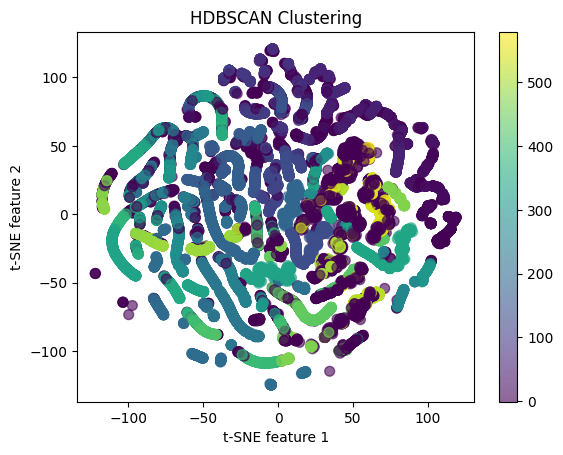

In [13]:

# 클러스터링 결과의 시각화
plt.scatter(tsne_results_2d[:, 0], tsne_results_2d[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.6, s=50)
plt.colorbar()
plt.title('HDBSCAN Clustering')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

In [16]:
print(clusterer.labels_)


[ -1  64  -1 ... 171 171 171]


In [155]:
items_df

item_id  store_id                                       item_content  \
0            3         2  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
1            4         2  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
2            5         2  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
3            6         2  안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...   
4            7         3  안녕하세요, 관상가 화인입니다 :) \n\n비대면 시대에 꼭 어울리는 관상 콘텐츠를...   
...        ...       ...                                                ...   
18023    22217      7165                                                      
18024    22218      7165                                                      
18025    22219      7165                                                      
18026    22220      7165                                                      
18027    22221      7165                                                      

       price  is_adult  sales_count  view_count            tags  \
0      20000         0            0          76     #일러스트#아트#그림   
1      25000         0            0          64     #일러스트#아트#그림   
2      30000         0            0          30     #일러스트#아트#그림   
3      50000         0            0          40     #일러스트#아트#그림   
4      20000         0            9         415  #관상가#관상#비대면#상담   
...      ...       ...          ...         ...             ...   
18023   6800         0            0           0    #미포함#확성기#아이콘   
18024   4800         0            0           1      #미포함#손가락숫자   
18025   4800         0            0           0         #미포함#여자   
18026   4800         0            0           0         #미포함#남자   
18027   4800         0            0           0       #미포함#괴생물체   

               item_category  \
0          미술 ∙ 디자인, 영상 ∙ 사진   
1          미술 ∙ 디자인, 영상 ∙ 사진   
2          미술 ∙ 디자인, 영상 ∙ 사진   
3          미술 ∙ 디자인, 영상 ∙ 사진   
4      타로 ∙ 사주 ∙ 관상, 심리 ∙ 상담   
...                      ...   
18023                     기타   
18024                     기타   
18025                     기타   
18026                     기타   
18027                     기타   

                                               text_data  kmean_cluster  \
0      안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...             63   
1      안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...             21   
2      안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...             38   
3      안녕하세요, 그림 스피드페인팅 유튜버 노넴입니다 :)\n\n원하시는 컨셉에 맞춰 일...             12   
4      안녕하세요, 관상가 화인입니다 :) \n\n비대면 시대에 꼭 어울리는 관상 콘텐츠를...             63   
...                                                  ...            ...   
18023                                     #미포함#확성기#아이콘기타             72   
18024                                       #미포함#손가락숫자기타             26   
18025                                          #미포함#여자기타             26   
18026                                          #미포함#남자기타             26   
18027                                        #미포함#괴생물체기타             26   

       HDBSCAN_cluster        weight  scaled_weight  
0                   -1  2.475738e-05      24.757378  
1                   64  2.084832e-05      20.848318  
2                   -1  9.772649e-06       9.772649  
3                   55  1.303020e-05      13.030199  
4                   84  1.351883e-04     135.188312  
...                ...           ...            ...  
18023              165  0.000000e+00       0.000000  
18024              171  3.257550e-07       0.325755  
18025              171  0.000000e+00       0.000000  
18026              171  0.000000e+00       0.000000  
18027              171  0.000000e+00       0.000000  

[18028 rows x 14 columns]

In [156]:

# 아이템 태그 카운트
item_tags = items_df['tags'].explode()  # 태그 리스트를 풀어서 각 요소를 row로 변환
item_tags_count = item_tags.value_counts()  # 각 태그별 개수 카운트

# 아이템 카테고리 카운트
item_categories_count = items_df['item_category'].value_counts()  # 카테고리별 개수 카운트

# 결과 출력
print("아이템 태그 카운트:\n", item_tags_count)
print("\n아이템 카테고리 카운트:\n", item_categories_count)

아이템 태그 카운트:
 tags
#아이콘#컬러#흑백#이미지         52
#아이콘소스#컬러#흑백#이미지       42
#아이콘#소스#컬러#흑백#이미지      41
                       30
#디지털#아트#템플릿            30
                       ..
#감성#여행#PPT#템플릿          1
#컬러풀#PPT#템플릿            1
#놀이#도안#영화관#무비데이#다온반     1
#파란색수영복#뒤태#허벅지          1
#수영복#몸매#섹시              1
Name: count, Length: 13558, dtype: int64

아이템 카테고리 카운트:
 item_category
미술 ∙ 디자인                              6507
디지털 템플릿, 미술 ∙ 디자인                      829
사진 ∙ 영상                                567
미술 ∙ 디자인, 디지털 템플릿                      475
미술 ∙ 디자인, 교육 ∙ 학습                      400
                                      ... 
미술 ∙ 디자인, 교육 ∙ 학습, 유아, 사진 ∙ 영상           1
미술 ∙ 디자인, 디지털 템플릿, 자기계발 ∙ 커리어, 전자책       1
미술 ∙ 디자인, 일상 ∙ 소통, 요리 ∙ 베이킹              1
사진 ∙ 영상, 뷸티 ∙ 패션, 웹화보                    1
IT ∙ 개발, 영상 ∙ 애니 ∙ 방송                    1
Name: count, Length: 1369, dtype: int64


In [157]:

# 아이템별 조회수를 기반으로 가중치 계산
items_df['weight'] = items_df['view_count'] / items_df['view_count'].sum()

# 각 태그 및 카테고리별로 아이템 선택 확률 분포 확인
tag_weights = items_df.explode('tags').groupby('tags')['weight'].sum()
category_weights = items_df.groupby('item_category')['weight'].sum()


In [158]:
category_weights

item_category
                               0.000714
/사진 ∙ 영상, 미술 ∙ 디자인             0.000019
ASMR                           0.000148
ASMR, 광고 ∙ 섭외                  0.000000
ASMR, 심리 ∙ 상담                  0.000193
                                 ...   
화분                             0.000003
환경 ∙ 지속가능성                     0.000162
환경구성                           0.000152
환경설정, 챌린지, 커뮤니티, 콘텐츠, 브랜딩      0.000012
효도쿠폰, 어버이날, 어린이집, 유치원, 가정의달    0.000008
Name: weight, Length: 1369, dtype: float64

In [159]:
total_purchases = 10000  # 총 생성할 구매 이벤트 수
cross_category_ratio = 0.15  # 다른 카테고리에서 구매할 비율 (15%)

purchase_data = []  # 구매 이벤트 데이터를 저장할 리스트

# 가중치 스케일 조정
scale_factor = 1e6  # 스케일링 팩터
items_df['scaled_weight'] = items_df['weight'] * scale_factor

for category, _ in category_weights.items():
    category_items = items_df[items_df['item_category'] == category]
    
    # 이 카테고리에서 생성할 구매 이벤트 수 계산
    category_weight_sum = category_items['scaled_weight'].sum()
    if category_weight_sum > 0:
        num_purchases = int(total_purchases * (category_items['scaled_weight'].sum() / items_df['scaled_weight'].sum()))
        probabilities = category_items['scaled_weight'] / category_weight_sum
        purchased_item_ids = np.random.choice(category_items['item_id'], size=num_purchases, p=probabilities.to_numpy())
        purchase_data.extend(purchased_item_ids)
    else:
        print(f"Skipping category '{category}' due to invalid weights.")

# 크로스 카테고리 구매 이벤트 생성
scaled_weight_sum = items_df['scaled_weight'].sum()
if scaled_weight_sum > 0:
    num_cross_purchases = int(total_purchases * cross_category_ratio)
    cross_purchased_item_ids = np.random.choice(items_df['item_id'], size=num_cross_purchases, p=(items_df['scaled_weight'] / scaled_weight_sum).to_numpy())
    purchase_data.extend(cross_purchased_item_ids)
else:
    print("Skipping cross-category purchases due to invalid weights.")

# 구매 데이터 집계 및 출력
purchase_df = pd.DataFrame({'item_id': purchase_data})
purchase_counts = purchase_df['item_id'].value_counts()

print(purchase_counts.head(10))


Skipping category 'ASMR, 광고 ∙ 섭외' due to invalid weights.
Skipping category 'IT ∙ 개발, 인공지능 프로그램, 미술 ∙ 디자인, 글쓰기' due to invalid weights.
Skipping category '글쓰기, 교육 ∙ 학습, 금융 ∙ 재테크' due to invalid weights.
Skipping category '글쓰기, 부업' due to invalid weights.
Skipping category '글쓰기, 뷰티 ∙ 패션' due to invalid weights.
Skipping category '글쓰기, 블로그, 전자책, 컨설팅' due to invalid weights.
Skipping category '글쓰기, 자기계발' due to invalid weights.
Skipping category '글쓰기, 커리어, 수익화' due to invalid weights.
Skipping category '글쓰기, 컨설팅, 콘텐츠' due to invalid weights.
Skipping category '금융 ∙ 재테크, 블로그 관리 대행, 광고 ∙ 섭외, 글쓰기' due to invalid weights.
Skipping category '농업, 글쓰기' due to invalid weights.
Skipping category '디지털노마드, 퍼스널브랜딩, SNS, 현실' due to invalid weights.
Skipping category '마케팅, 블로그, 광고, 뷰티, 컨설팅' due to invalid weights.
Skipping category '마케팅, 블로그, 상품리뷰, 컨설팅' due to invalid weights.
Skipping category '마케팅, 블로그, 컨설팅, 상품리뷰' due to invalid weights.
Skipping category '문학 ∙ 소설, 학습' due to invalid weights.
Skippin

In [162]:

# 총 유저 수 설정
num_users = 231000
# item_category 열에서 None 값을 문자열 'None'으로 변환
items_df['item_category'] = items_df['item_category'].fillna('None')

# 고유한 카테고리 목록 추출 및 정렬
unique_categories = np.sort(items_df['item_category'].unique())

# 카테고리별 가중치 계산 (이 예시에서는 각 카테고리별 아이템 수를 기반으로 간단한 가중치를 사용)
category_weights = np.array([items_df[items_df['item_category'] == cat]['view_count'].sum() for cat in unique_categories])

# 가중치를 확률로 변환 (각 가중치를 가중치 합계로 나눔)
category_probabilities = category_weights / category_weights.sum()

# 파워 로 분포의 shape 파라미터 설정
# 알파가 1보다 큰 값에서 분포는 무한대의 평균을 갖지만, 알파가 2보다 크면 분산도 유한하게 됩니다.
# 실제 분포에 따라 이 값을 조절해야 합니다.
alpha = 2.3  # 분포의 모양을 결정하는 파라미터

# 파워 로 분포를 사용하여 구매 횟수를 시뮬레이션합니다.
# x_min는 분포의 최소값, size는 생성할 샘플 수입니다.
x_min = 1  # 분포의 최소값
purchase_counts = (np.random.zipf(alpha, num_users) + x_min - 1)

# 실제 데이터에 맞게 최대값을 350으로 제한합니다.
purchase_counts = np.clip(purchase_counts, a_min=None, a_max=350)

# 구매 횟수가 0 이하인 경우를 최소 1회 구매로 조정
purchase_counts[purchase_counts < 1] = 1


# 유저별 구매 이벤트 생성
user_purchases = []
for user_id in range(num_users):
    num_purchases = purchase_counts[user_id]  # 이 유저의 구매 횟수
    for _ in range(num_purchases):
        # 카테고리 가중치를 기반으로 카테고리 선택
        selected_category = np.random.choice(unique_categories, p=category_probabilities)
        # 선택된 카테고리 내에서 아이템 선택 (여기서는 단순화를 위해 무작위 선택)
        category_items = items_df[items_df['item_category'] == selected_category]
        purchased_item_id = np.random.choice(category_items['item_id'])
        user_purchases.append({'user_id': user_id, 'item_id': purchased_item_id})

# 결과를 DataFrame으로 변환
purchase_df = pd.DataFrame(user_purchases)


In [163]:

# 구매 데이터 확인
purchase_df.head(60)


user_id  item_id
0         0    14006
1         1      148
2         2     1429
3         2    10811
4         2    14774
5         3     3125
6         3    14266
7         4    10221
8         5    16351
9         6     4314
10        7    18987
11        8     7191
12        9    13568
13       10    17739
14       10    20027
15       10    13579
16       10    13596
17       10     2928
18       11     6144
19       12     3052
20       13     2107
21       13    12276
22       13     6694
23       13    10110
24       13     1493
25       13    15436
26       14     6435
27       15     4165
28       16     1290
29       17    14186
30       18    17541
31       18     3321
32       19    18842
33       20    16430
34       21    20553
35       22    10190
36       23    13299
37       24     3936
38       24     2454
39       24    13252
40       25        9
41       26    14881
42       27     9476
43       28     2083
44       29    11507
45       30    11332
46       31     3437
47       32     2307
48       33     3038
49       34    10289
50       34     7505
51       34    16266
52       34     8530
53       35     1861
54       35    17712
55       35     6540
56       35    17946
57       35     7989
58       35     2333
59       35     2388

In [164]:
user_item_counts = purchase_df.groupby('user_id')['item_id'].count()

# Calculate the frequency of each count of items purchased
item_count_freq = user_item_counts.value_counts().sort_index()

# Display the frequency of item counts
print(item_count_freq)

item_id
1      161140
2       32761
3       12789
4        6743
5        3941
        ...  
332         1
335         1
347         1
348         1
350        60
Name: count, Length: 227, dtype: int64
